In [19]:
# + Importing the data
# + Cleaning the data
# + Splitting the data into Training/Test sets
#   Create a model
#   Train the model
#   Make Predictions
#   Evaluate and Improve

In [20]:
# + Importing the Data

import pandas as pd

fileName = 'stock-market-data-5y.csv'

df = pd.read_csv(fileName)

df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000
mean,6453.332599,6490.039058,6407.286790,6448.411360,6448.411360,96222.962963
std,1261.376255,1262.418721,1256.469595,1259.101220,1259.101220,88030.479826
min,4623.149902,4623.149902,4531.149902,4544.200195,4544.200195,0.000000
25%,5456.375000,5499.375000,5408.400147,5452.824951,5452.824951,0.000000
50%,5943.149902,5972.700195,5910.799805,5938.799805,5938.799805,122200.000000
75%,7828.475098,7867.375000,7763.199951,7815.300049,7815.300049,159000.000000
max,9109.150391,9119.200195,8925.549805,8996.250000,8996.250000,437000.000000


In [21]:
df.shape

(1234, 7)

In [22]:
# + Cleaning the Data

df1 = df.reset_index()['Close']
df1.shape

(1234,)

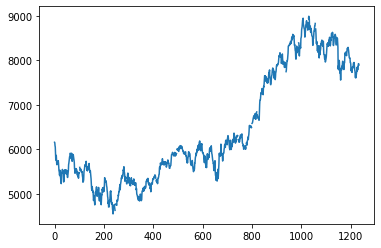

In [23]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [24]:
import numpy as np
df1

0       6157.600098
1       6146.350098
2       6079.799805
3       6048.250000
4       5904.600098
           ...     
1229    7865.950195
1230    7861.049805
1231    7925.149902
1232    7928.950195
1233    7896.250000
Name: Close, Length: 1234, dtype: float64

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
#print(df1)

In [26]:
# + Splitting the data into Training/Test sets

training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [27]:
training_size, test_size

(802, 432)

In [28]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [29]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [30]:
print(X_train.shape), print(y_train.shape)

(701, 100)
(701,)


(None, None)

In [44]:
nt(X_train[1]

[[0.35986792]
 [0.34491968]
 [0.3378331 ]
 [0.30556709]
 [0.27372782]
 [0.27176244]
 [0.29627921]
 [0.27126824]
 [0.24940188]
 [0.24944685]
 [0.26501267]
 [0.25760035]
 [0.26221627]
 [0.25882455]
 [0.26932533]
 [0.25678053]
 [0.23811495]
 [0.21741664]
 [0.21601279]
 [0.19608945]
 [0.19941372]
 [0.22069605]
 [0.1912714 ]
 [0.19132756]
 [0.17258334]
 [0.15933101]
 [0.15309793]
 [0.17201061]
 [0.20480449]
 [0.21041988]
 [0.21057716]
 [0.22512102]
 [0.20546715]
 [0.21886545]
 [0.20776946]
 [0.20061543]
 [0.16138633]
 [0.1705618 ]
 [0.17723292]
 [0.21969647]
 [0.22281871]
 [0.22339144]
 [0.20641047]
 [0.21935954]
 [0.22165067]
 [0.21342971]
 [0.20243484]
 [0.22176297]
 [0.20337816]
 [0.21719202]
 [0.20270432]
 [0.18631867]
 [0.18430832]
 [0.19533697]
 [0.21025142]
 [0.21971895]
 [0.24933454]
 [0.25674686]
 [0.26777551]
 [0.27929825]
 [0.28965305]
 [0.28792347]
 [0.30643188]
 [0.30679118]
 [0.30268076]
 [0.30132188]
 [0.29150613]
 [0.27886031]
 [0.30711692]
 [0.28758654]
 [0.26614705]
 [0.26

In [31]:
print(X_test.shape), print(ytest.shape)

(331, 100)
(331,)


(None, None)

In [46]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [57]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [65]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100, 1)))
model.add(keras.layers.LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

NotImplementedError: Cannot convert a symbolic Tensor (lstm_10/strided_slice:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported

In [24]:
model.summary()

NameError: name 'model' is not defined

In [34]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.

In [35]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

In [25]:
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
tf.__version__

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()